In [1]:
#!pip

## r1_correctLC

In [2]:
from astropy import stats #for MAD

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from lightkurve import LightCurve
import astropy.units as u
import logging
#import batman-package as batman
#batman = __import__("batman-package")
import matplotlib
#from basic_functions import stop

logging.basicConfig(format='%(asctime)s %(levelname)s: %(name)s(%(funcName)s): %(message)s', level=logging.DEBUG)

import tessutils #NOT the normal utils!

#dataDir = "data"
#downloadDir = "mastDownload/TESS"
#outdir = "results_notCorrectedForSineLong"
#correctSine = False

###################################################################################################


2019-11-17 16:51:54,316 DEBUG: matplotlib.pyplot(switch_backend): Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [4]:
import matplotlib.pyplot as plt
from astropy.table import Table
import astropy.units as u
from astropy.io import fits 
import os
from lightkurve import LightCurve
import numpy as np
import requests
import gzip 
import pickle

import logging
logger = logging.getLogger(__name__)

import subprocess
from matplotlib import rc

import os
import shutil

In [5]:
lc = None
folderName = 'tess2018206045859-s0001-0000000092352620-0120-s'
downloadDir = 'CleanPath/LowMags/TIC_92352620/' #Path must flow like this

lc, sectors = tessutils.loadLC(folderName, downloadDir, fluxType="PDCSAP", normalised=True)
lcOri = lc.copy()

# Show what it looks like
#plt.figure()
#plt.scatter(lc.time, lc.flux, label="LC", marker='.', s=5)
#lcB = lc.bin(100, method="median")
#plt.scatter(lcB.time, lcB.flux, label="LC", marker='.', s=5)
#plt.savefig(os.path.join(downloadDir, "TIC_92352620_raw.pdf"))
#plt.show()

2019-11-17 16:51:54,671 INFO: tessutils(loadLC): Cadence is 2 min for CleanPath/LowMags/TIC_92352620/tess2018206045859-s0001-0000000092352620-0120-s\tess2018206045859-s0001-0000000092352620-0120-s_lc.fits
D:\Python\Anaconda\lib\site-packages\lightkurve\lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


## Parameters

In [6]:
q1 = 0.2098861500
q2 = 0.2455166013
u1 = 2 * np.sqrt(q1) * q2
u2 = np.sqrt(q1) * (1. - 2 * q2)

###Changing params. to params_
#params = batman.TransitParams()
params_t0 =  2458119.72117-2457000                      #time of inferior conjunction
params_per = 1.27492510                      #orbital period
params_rp = 0.12627                      #planet radius (in units of stellar radii)
params_a = 3.835                       #semi-major axis (in units of stellar radii)
params_inc = 87.08                     #orbital inclination (in degrees)
params_ecc = 0.0605                      #eccentricity
params_w = 9.7                       #longitude of periastron (in degrees)
params_u = [u1, u2]                #limb darkening coefficients
params_limb_dark = "quadratic"       #limb darkening model

# According to TESS alert
params_t0 = 1491.9986898
params_a = 3.8083
params_rp = 0.1234

q1 = 0.2098861500
q2 = 0.2455166013
u1 = 2 * np.sqrt(q1) * q2
u2 = np.sqrt(q1) * (1. - 2 * q2)
params_u = [u1, u2]

antiphaseCentred = 0.1 #Change from 0 to something else???

period = params_per * u.day#1.27492510 * u.day
t0 = params_t0 * u.day #(2458119.72117-2457000) * u.day

## Median Detrend

In [7]:
def medianDetrend(lc, windowFactorDurationTransit, returnMedians=False): #remove durationTransitHour
    
    #durationTransit = durationTransitHour / 24.
    window = windowFactorDurationTransit # * durationTransit
    
    t = lc.time / window
    t -= np.amin(t)
    tMax = int(np.ceil(np.amax(t)))
    
    medians = []
    ts = []
    te = []
    for windowStart in range(0, tMax):
        ts.append(windowStart)
        te.append(windowStart+1.)
        currentIds = np.where(np.logical_and(t >= windowStart, t < windowStart+1.))
        median = np.nanmedian(lc.flux[currentIds])
        medians.append(median)
        lc.flux_err[currentIds] /= median        
        lc.flux[currentIds] /= median

    if returnMedians:
        return lc, medians, ts, te, t
    return lc 

## (Removed) Light Curve

In [8]:
plt.rc('font', family="Times New Roman")
plt.rc('font', size=14)

## (Removed) Light Curve (Folding "In Phase")

## (Removed) DeltaT Bin

## (Removed) Best-Fit Model

In [9]:
time = max(lc.time)-min(lc.time)
time
lc == lcOri

False

2019-11-17 16:51:54,833 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: Matching :family=Times New Roman:style=normal:variant=normal:weight=normal:stretch=normal:size=16.8.
2019-11-17 16:51:54,834 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,835 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:54,836 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,836 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:54,837 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 

2019-11-17 16:51:54,870 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal demi normal>) = 10.24
2019-11-17 16:51:54,870 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2019-11-17 16:51:54,871 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2019-11-17 16:51:54,872 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,872 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal book normal>) = 10.05
2019-11-17 16:51:54,873 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
2019-11-17 16:5

2019-11-17 16:51:54,907 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
2019-11-17 16:51:54,908 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,909 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,909 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,910 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,911 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Gothic' (GOTHIC.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,912 DEBUG: matplotlib

2019-11-17 16:51:54,943 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Candara' (Candaral.ttf) normal normal light normal>) = 10.24
2019-11-17 16:51:54,944 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Constantia' (constanz.ttf) italic normal bold normal>) = 11.335
2019-11-17 16:51:54,945 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,945 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal bold condensed>) = 11.535
2019-11-17 16:51:54,946 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal bold normal>) = 10.335
2019-11-17 16:51:54,947 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gabriola' (Gabriola.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,948 DEBUG: matplotlib.f

2019-11-17 16:51:54,985 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal regular normal>) = 10.05
2019-11-17 16:51:54,985 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal bold normal>) = 11.335
2019-11-17 16:51:54,986 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,987 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,988 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:54,989 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:54,990 DEBUG: matplotlib.font_m

2019-11-17 16:51:55,027 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal book normal>) = 11.05
2019-11-17 16:51:55,028 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,029 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,030 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,031 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,032 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'MS Outlook' (OUTLOOK.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,032 DEBUG: mat

2019-11-17 16:51:55,070 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,070 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
2019-11-17 16:51:55,071 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,072 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'High Tower Text' (HTOWERT.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,073 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
2019-11-17 16:51:55,074 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,075 DEBUG: matplotlib.font_

2019-11-17 16:51:55,120 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,121 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
2019-11-17 16:51:55,122 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Goudy Old Style' (GOUDOSB.TTF) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,123 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,124 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,125 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,12

2019-11-17 16:51:55,663 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2019-11-17 16:51:55,666 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,667 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,670 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,671 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,672 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 norma

2019-11-17 16:51:55,747 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,749 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
2019-11-17 16:51:55,750 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,752 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,753 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,757 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 0.14500000000000002
2019-11-17 16:51:55,7

2019-11-17 16:51:55,828 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,830 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,832 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,834 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,835 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 11.24
2019-11-17 16:51:55,836 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,836 DEBUG: matplotlib.font_m

2019-11-17 16:51:55,876 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal regular normal>) = 10.05
2019-11-17 16:51:55,877 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palatino Linotype' (palabi.ttf) italic normal bold normal>) = 11.335
2019-11-17 16:51:55,878 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,879 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Wingdings' (wingding.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,880 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,882 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal book normal>) = 10.05
2019-11-17 16:5

2019-11-17 16:51:55,925 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
2019-11-17 16:51:55,925 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal bold normal>) = 10.335
2019-11-17 16:51:55,926 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_BI.TTF) italic normal bold normal>) = 11.335
2019-11-17 16:51:55,927 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Handwriting' (LHANDW.TTF) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,928 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 1.145
2019-11-17 16:51:55,928 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal bold normal>) = 11.335
2019-11-17 16:51:55,9

2019-11-17 16:51:55,970 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,971 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Baskerville Old Face' (BASKVILL.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:55,971 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal bold normal>) = 11.335
2019-11-17 16:51:55,972 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
2019-11-17 16:51:55,973 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal roman normal>) = 10.145
2019-11-17 16:51:55,974 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Franklin Gothic Medium' (framd.ttf) normal normal medium normal>) = 10.145
2019-11

2019-11-17 16:51:56,023 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2019-11-17 16:51:56,025 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:56,027 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:56,029 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2019-11-17 16:51:56,031 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
2019-11-17 16:51:56,034 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:56,038 DEBUG: matplotlib.font_manager

2019-11-17 16:51:56,147 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal book normal>) = 11.05
2019-11-17 16:51:56,148 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2019-11-17 16:51:56,150 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
2019-11-17 16:51:56,153 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal bold normal>) = 10.335
2019-11-17 16:51:56,154 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-Regular.otf) normal normal 400 normal>) = 10.05
2019-11-17 16:51:56,155 DEBUG: matplotlib.font_manager(_findfont_cached): findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
2019-11-17 16

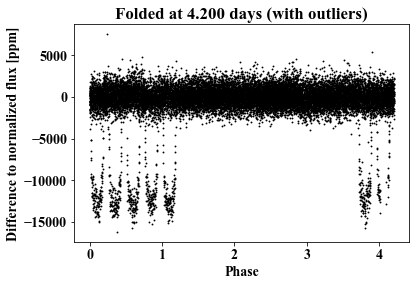

2019-11-17 16:51:57,643 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:51:57,673 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:51:57,675 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:51:58,177 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:51:58,193 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:51:58,194 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


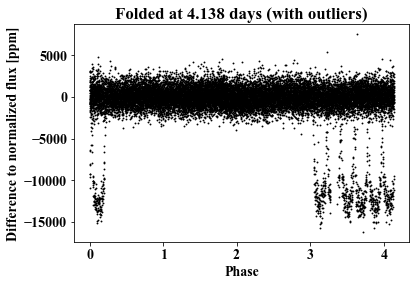

2019-11-17 16:51:58,835 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:51:58,854 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:51:58,854 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:51:59,398 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:51:59,413 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:51:59,414 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


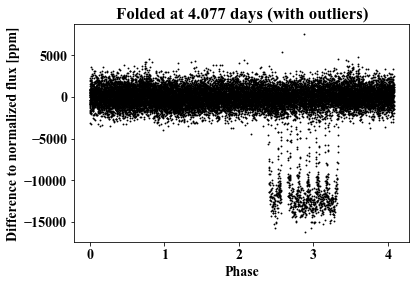

2019-11-17 16:52:00,100 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:00,118 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:00,119 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:00,649 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:00,683 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:00,684 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


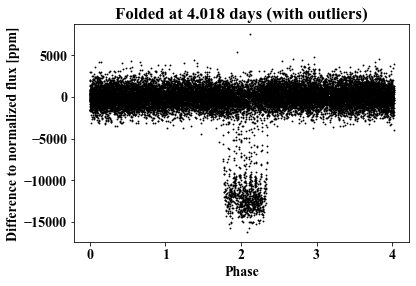

2019-11-17 16:52:01,335 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:01,354 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:01,355 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:01,868 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:01,900 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:01,902 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


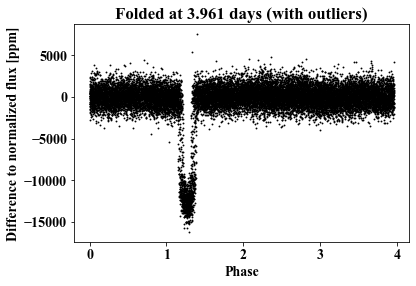

2019-11-17 16:52:02,600 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:02,618 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:02,619 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:03,095 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:03,111 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:03,112 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


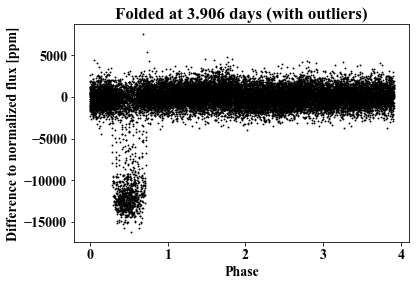

2019-11-17 16:52:03,712 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:03,730 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:03,731 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:04,234 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:04,251 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:04,252 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


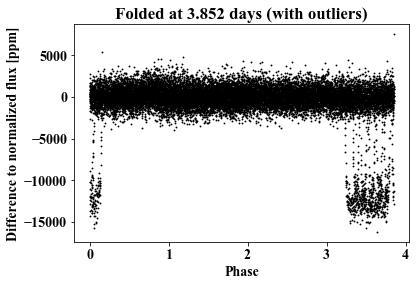

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [10]:
time = max(lc.time)-min(lc.time)
lcTransit = lc.copy()
def gridfreq(lc, N=10):
    periods=[]
    phases=[]
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_beforeout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods


gridfreq(lcTransit)

2019-11-17 16:52:05,584 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:05,601 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:05,602 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:06,694 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:06,720 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:06,722 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


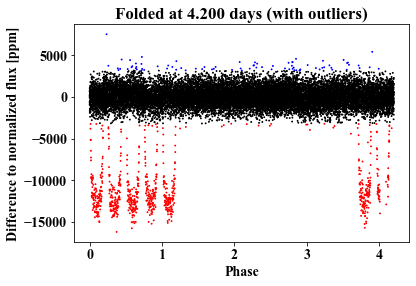

2019-11-17 16:52:08,600 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:08,617 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:08,618 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:09,635 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:09,650 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:09,651 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


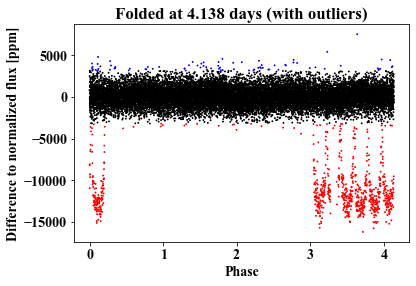

2019-11-17 16:52:11,422 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:11,451 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:11,453 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:12,513 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:12,528 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:12,529 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


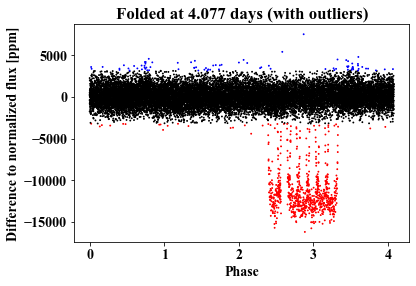

2019-11-17 16:52:14,521 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:14,539 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:14,540 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:15,625 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:15,641 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:15,642 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


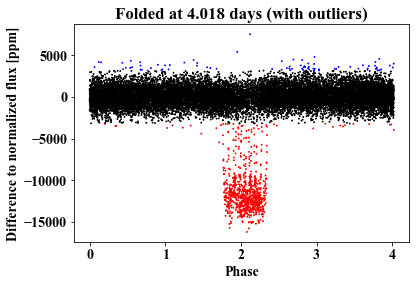

2019-11-17 16:52:17,368 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:17,386 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:17,387 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:18,486 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:18,501 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:18,502 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


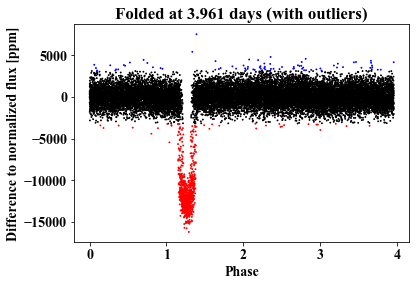

2019-11-17 16:52:20,494 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:20,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:20,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:21,695 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:21,712 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:21,713 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


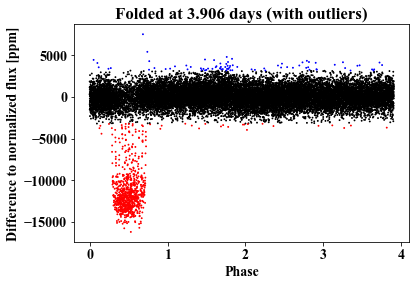

2019-11-17 16:52:23,492 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:23,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:23,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:24,602 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:24,617 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:24,618 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


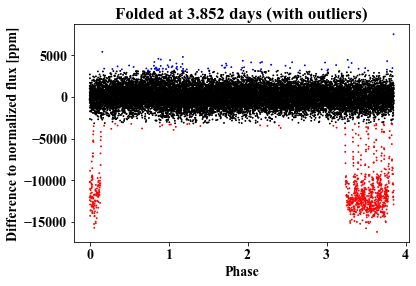

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [11]:
time = max(lc.time)-min(lc.time)
lcTransit = lc.copy()
def gridfreq_col(lc, N=10):
    periods=[]
    phases=[]
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(lc.flux)
        std = np.std(flux_nomad)
        
        col = ['k']*len(phase)
        col = np.array(col)
        col[np.where(flux_nomad >= 4*mad)] = 'b'
        col[np.where(flux_nomad <= -4*mad)] = 'r'
        ind_norm = np.where(col == 'k')
        ind_outl_pos = np.where(col == 'b')
        ind_outl_neg = np.where(col == 'r')
        
        #Now plot number of outliers PER WINDOW, and see if this it matches with the colored light curve.
        
        ##Outlier removal below
        #flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
        
        plt.scatter(phase, (lcTransit.flux-1.)*1e6, marker=".", color=col, s=3)
        plt.title("Folded at {} days".format('%.3f'%(period))+' (with outliers)')
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_markedout{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq_col(lcTransit)



## Removal of Outliers (with astropy)

2019-11-17 16:52:25,733 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:25,769 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:25,770 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:26,263 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:26,283 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:26,284 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


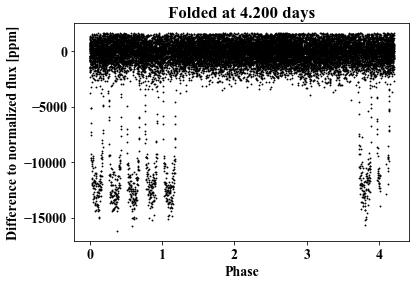

2019-11-17 16:52:26,886 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:26,909 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:26,911 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:27,481 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:27,512 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:27,513 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


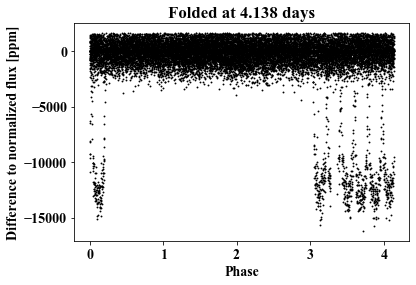

2019-11-17 16:52:28,280 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:28,318 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:28,319 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:28,905 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:28,921 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:28,924 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


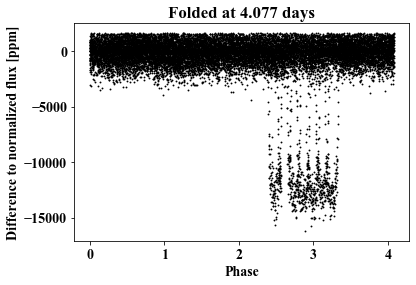

2019-11-17 16:52:29,616 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:29,640 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:29,641 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:30,203 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:30,222 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:30,223 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


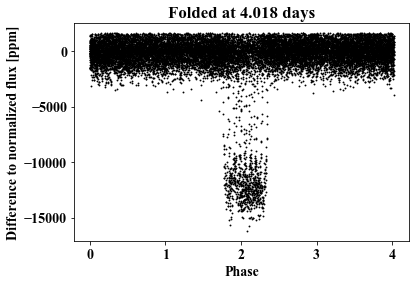

2019-11-17 16:52:30,835 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:30,853 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:30,854 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:31,400 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:31,417 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:31,418 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


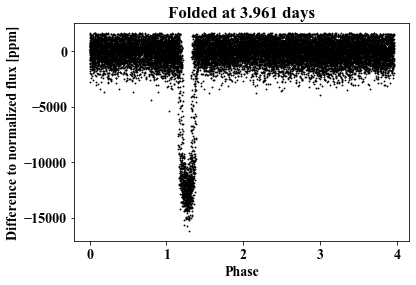

2019-11-17 16:52:32,070 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:32,088 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:32,088 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:32,564 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:32,581 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:32,582 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


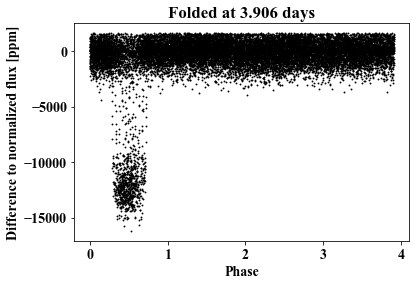

2019-11-17 16:52:33,263 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:33,284 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:33,285 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:52:33,841 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:52:33,860 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:52:33,862 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


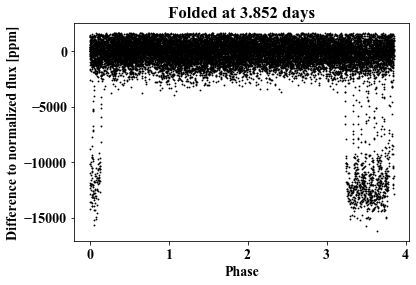

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [12]:
lcTransit = lc.copy()
def gridfreq(lc,N=10):
    periods=[]
    phases=[]
    time = max(lc.time)-min(lc.time)
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        phase = (lc.time % period)
        ##Outlier removal below
        flux_nomad = lc.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
        plt.scatter(phase, (flux_mad)*1e6, marker=".", color="k", s=3)
        plt.title("Folded at {} days".format('%.3f'%(period)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFold_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
        phases.append(phase)
    return periods

gridfreq(lcTransit)

In [13]:
def window1(a, w=100, o=10, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    print(a.strides)
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    #return (o-w, o+w)
    
#def window2(a, startpos):
    #a[N:N+11]
    
def count1(a, mad, std):
    firstapps = []
    #firstapp = (mad-lc)/std
    firstapp = (a - mad)/std
    for i in range (0, len(firstapp)):
        if firstapp[i] < std:
            firstapp[i] = 1
        else:
            firstapp[i] = 0
    firstapps.append(firstapp)
    outlier_count = np.count_nonzero(firstapps)
    return outlier_count

In [15]:
N = 10 
dt=5
time = max(lc.time)-min(lc.time)
dt = dt/24 #converting to day
period = 3.9611876601163045
        
##Binning below
#s = period / dt
#lcB = lc.bin(binsize=s, method='median') #Do not bin until neg outliers are removed
#phasebin = (lcB.time % period) #Do not bin until neg outliers are removed
##Binninng above
                    
## +Outlier removal below
flux_nomad = lc.flux-1
mad = stats.median_absolute_deviation(flux_nomad)
flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
## +Outlier removal above
    
## -Outlier removal below
    
std = np.std(flux_nomad)
windows = window1(flux_nomad)
print((mad-windows[5])/std)
count1(windows[5], mad, std)

#firstapps=[]
#for i in range(0, 11):
    #for j in range(0, len(windows[3])):
    #firstapp = (mad - windows[3][j])/std
    #firstapps.append(firstapp)
#return firstapps
    
## -Outlier removal above


(4,)
[ 0.34629056  0.3999022   0.51769006  0.45126122  1.1117655   0.3130874
 -0.0763853   0.06431142  0.34933156  0.26163825  1.4312277   0.7036864
  0.10837208 -0.15626213  0.30371663  0.71051174  0.0686364  -0.5215871
  0.1127421   0.8497217  -0.31263688 -0.31191605 -0.34908378  0.1151749
 -0.17910337  0.25704297  0.26078227 -0.16153318  0.04201079  0.31964242
  0.29475132  0.496741   -0.12116678  0.23956288  0.06579813  0.16680424
  0.7094755   0.945209    0.8253938  -0.34417313  0.24267145  0.3458851
  0.54956424 -0.6051131   1.0027852   0.778157    0.67181224  0.6049104
 -0.18401402  0.19527698  0.03890222 -0.02106171  0.7454944  -0.30772623
 -0.20189959  1.0611048   0.7959074  -0.36417612  0.6872875   0.76989
  0.6152723   0.08728784  0.53688216  0.8127793   0.35036775  0.80171907
  0.20735085  0.49286655 -0.33043233  0.0043475   0.77230024  0.88522255
  0.22699343  0.47824726  0.55316836  0.5403737   0.21473934 -0.16941725
  0.23303036 -0.30407703 -0.04201079  0.5626968   0.609

76

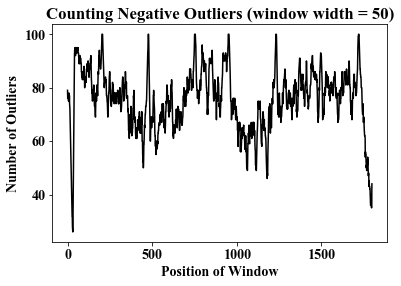

In [17]:
x = np.linspace(0, len(windows), num=len(windows))
y = []
for i in range (0, len(windows)):
    ys = count1(windows[i], mad, std)
    y.append(ys)
#print(y)
plt.plot(x, y, c='k')
plt.title('Counting Negative Outliers (window width = 50)')
plt.ylabel('Number of Outliers')
plt.xlabel('Position of Window')
#plt.savefig(os.path.join(downloadDir,"CountOut3.pdf"), bbox_inches='tight')
plt.show()

## Binning

2019-11-17 16:53:14,240 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:14,270 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:14,271 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:14,355 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:14,374 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:14,375 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


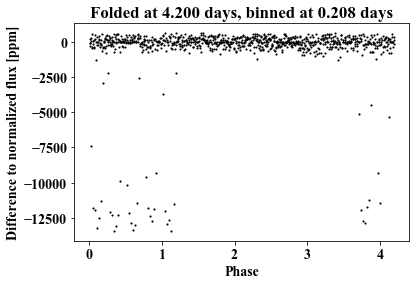

2019-11-17 16:53:14,624 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:14,647 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:14,648 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:14,735 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:14,754 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:14,755 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


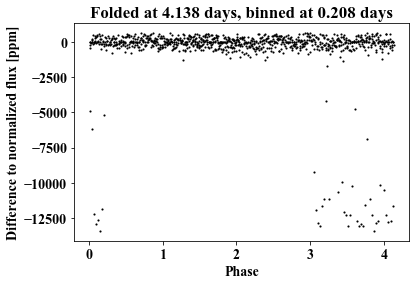

2019-11-17 16:53:15,106 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:15,137 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:15,138 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:15,223 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:15,243 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:15,244 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


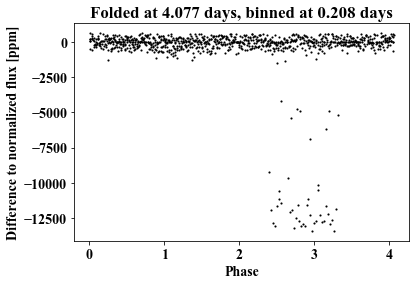

2019-11-17 16:53:15,508 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:15,537 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:15,538 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:15,668 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:15,703 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:15,704 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


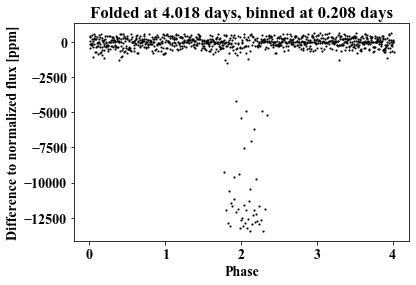

2019-11-17 16:53:15,997 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:16,018 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:16,019 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:16,115 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:16,144 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:16,145 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


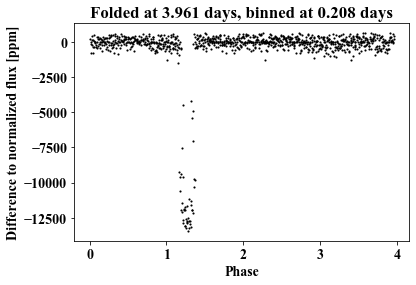

2019-11-17 16:53:16,487 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:16,509 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:16,510 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:16,594 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:16,612 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:16,613 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


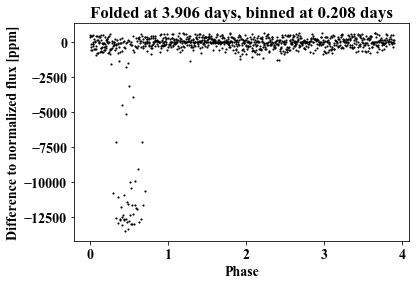

2019-11-17 16:53:16,953 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:16,992 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:16,993 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.
2019-11-17 16:53:17,115 DEBUG: matplotlib.backends.backend_pdf(fontName): Assigning font /b'F1' = 'C:\\WINDOWS\\Fonts\\timesbd.ttf'
2019-11-17 16:53:17,144 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Embedding font C:\WINDOWS\Fonts\timesbd.ttf.
2019-11-17 16:53:17,146 DEBUG: matplotlib.backends.backend_pdf(writeFonts): Writing TrueType font.


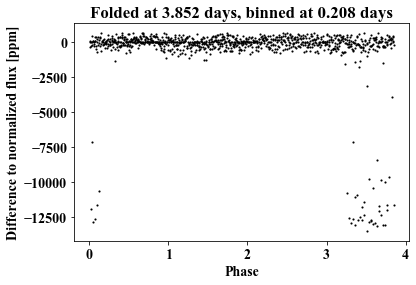

[4.2,
 4.1376374607581035,
 4.077099771591672,
 4.018307989481871,
 3.9611876601163045,
 3.9056685033252827,
 3.851684124605596]

In [18]:
def meandt(lc, N=10, dt=5):
    periods = []
    time = max(lc.time)-min(lc.time)
    dt = dt/24 #converting to day
    for i in np.arange(1/4.2, 1/3.8, (1/time * 1/N)): #p 3.8 to 4.2
        period = 1/i
        
        ##Binning below
        s = period / dt
        lcB = lc.bin(binsize=s, method='median')
        phasebin = (lcB.time % period)
        ##Binninng above
                    
        ##Outlier removal below
        flux_nomad = lcB.flux-1
        mad = stats.median_absolute_deviation(flux_nomad)
        flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
        ##Outlier removal above
    
        plt.scatter(phasebin, (flux_mad)*1e6, marker=".", color="k", s=5)
        plt.title("Folded at {} days".format('%.3f'%(period))+', binned at {} days'.format('%.3f'%(dt)))
        plt.xlabel("Phase")
        plt.ylabel("Difference to normalized flux [ppm]")
        plt.savefig(os.path.join(downloadDir,"PhaseFoldBin_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
        plt.show()
        periods.append(period)
    return periods

meandt(lc)


## Window Sliding

In [50]:
def window(a, w=50, o=5, copy=False):
    sh = (a.size - w + 1, w)
    st = a.strides * 2
    print(a.strides)
    view = np.lib.stride_tricks.as_strided(a, strides = st, shape = sh)[0::o]
    if copy:
        return view.copy()
    else:
        return view
    #return (o-w, o+w)
    
#def window2(a, startpos):
    #a[N:N+11]
    
def count(a, mad, std):
    firstapps = []
    #firstapp = (mad-lc)/std
    #firstapp = (a - mad)/std
    firstapp = a
    for i in range (0, len(firstapp)):
        if firstapp[i] >= 4*mad:
            firstapp[i] = 1
        else:
            firstapp[i] = 0
    firstapps.append(firstapp)
    outlier_count = np.count_nonzero(firstapp)
    return outlier_count

def count3(a, mad):
    firstapps = []
    firstapp = a
    firstapp[np.where(a >= -4*mad)] = 0
    firstapp[np.where(a <= -4*mad)] = 1
    outlier_count = np.count_nonzero(firstapp)
    return outlier_count

In [ ]:
#col = ['k']*len(phase)
        #col = np.array(col)
        #col[np.where(flux_nomad >= 4*mad)] = 'b'
        #col[np.where(flux_nomad <= -4*mad)] = 'r'
        #ind_norm = np.where(col == 'k')
        #ind_outl_pos = np.where(col == 'b')
        #ind_outl_neg = np.where(col == 'r')

0.0003080368
(4,)
[4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3]


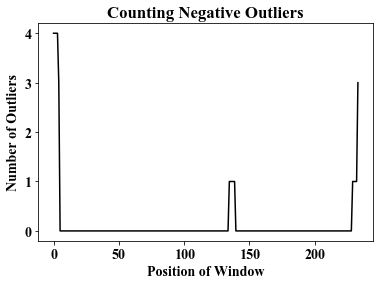

In [54]:
N = 10 
dt=5
time = max(lc.time)-min(lc.time)
dt = dt/24 #converting to day
period = 3.9611876601163045
        
##Binning below
s = period / dt
lcB = lc.bin(binsize=s, method='median')
phasebin = (lcB.time % period)
##Binninng above
                    
## +Outlier removal below
flux_nomad = lcB.flux-1
MAD = stats.median_absolute_deviation(flux_nomad)
print(mad)
flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
## +Outlier removal above
    
## -Outlier removal below
    
std = np.std(flux_nomad)
windows = window(flux_nomad, w=20, o=4)

## -Outlier removal above

x = np.linspace(0, len(windows), num=len(windows))
y = []
for i in range (0, len(windows)):
    ys = count(windows[i], mad=MAD, std=std)
    y.append(ys)
print(y)
plt.plot(x, y, c='k')
plt.title('Counting Negative Outliers')
plt.ylabel('Number of Outliers')
plt.xlabel('Position of Window')
#plt.savefig(os.path.join(downloadDir,"CountOut3.pdf"), bbox_inches='tight')
plt.show()


## Number of outliers versus mid-position of the window

In [ ]:
flux_nomad = lcB.flux-1
mad = stats.median_absolute_deviation(flux_nomad)
flux_mad = np.where(flux_nomad > 4*mad, 0, flux_nomad)

windows = window(flux_mad, w=100, o=10)
x = np.linspace(0, len(windows), num=len(windows))
y = []
for i in range (0, len(windows)):
    ys = count(windows[i], mad, std)
    y.append(ys)
print(y)
plt.plot(x, y, c='k')
plt.title('Counting Negative Outliers')
plt.ylabel('Number of Outliers')
plt.xlabel('Position of Window')
#plt.savefig(os.path.join(downloadDir,"CountOut3.pdf"), bbox_inches='tight')
plt.show()

In [ ]:
## New Method for counting
print(mad)
index_posout = (lc - mad) >= 2*std
index_negout = (lc - mad) <= 2*std
print(index_posout)
#count_posouts = []
#count_negouts = []
for i in range (6, 36-6):
    count_posout = np.sum(index_posout[i-6, i+6])
    print(count_posout)
    count_negout = np.sum(index_negout[i-6, i+6])
    count_posouts.append(count_posout)
    count_negouts.append(count_negout)

In [ ]:
## New Method for counting
def correct_outliers(lc, c=4, w=36, N=6):
    std = np.std(lc)
    mad = stats.median_absolute_deviation(lc)
    index_posout = (lc - mad) >= c*std
    index_negout = (lc - mad) <= c*std
    count_posouts = []
    count_negouts = []
    for i in range (w, w-N):
        count_posout = np.sum(index_posout[i-N, i+N])
        count_negout = np.sum(index_negout[i-N, i+N])
        count_posouts.append(count_posout)
        count_negouts.append(count_negout)
        #return count_posouts, count_negouts
    return count_posouts, count_negouts

correct_outliers(flux_nomad)

In [ ]:
        #count_negout = np.sum(index_negout(i-w, i+w)
        #return count_posout
#correct_outliers(flux_nomad, c=2)

In [ ]:
def meandt1(lc, N=10, dt=5):
    time = max(lc.time)-min(lc.time)
    dt = dt/24 #converting to day
    period = 3.9611876601163045
        
    ##Binning below
    s = period / dt
    lcB = lc.bin(binsize=s, method='median')
    phasebin = (lcB.time % period)
    ##Binninng above
                    
    ## +Outlier removal below
    flux_nomad = lcB.flux-1
    mad = stats.median_absolute_deviation(flux_nomad)
    print(mad)
    flux_mad = np.where(flux_nomad > 2*mad, 0, flux_nomad)
    ## +Outlier removal above
    
    ## -Outlier removal below
    
    std = np.std(flux_nomad)
    #windows = np.array_split(flux_mad, 24)
    windows = window(flux_mad)
    #print(windows)
    firstapp = (mad-windows)/std
    print(firstapp[50])
    #firstapps=[]
    #for i in range(0, 11):
    #for j in range(0, len(windows[3])):
        #firstapp = (mad - windows[3][j])/std
        #firstapps.append(firstapp)
    #return firstapps
    
    #print(firstapps)
    ## -Outlier removal above
    
    #plt.scatter(phasebin, flux_mad*1e6, marker=".", color="k", s=5)
    #plt.title("Folded at {} days".format('%.3f'%(period))+', binned at {} days'.format('%.3f'%(dt)))
    #plt.xlabel("Phase")
    #plt.ylabel("Difference to normalized flux [ppm]")
    #plt.savefig(os.path.join(downloadDir,"PhaseFoldBin_{}.pdf".format('%.3f'%(period))), bbox_inches='tight')
    #plt.show()
    
meandt1(lc)

In [ ]:
# Look at the 1.13 d stellar rotation Period
#params_per2 = 1.27492510
#params_per = 2.27492510
params_per = 3.95
lcTransitRemoved = lc.copy()

#params_per = 3.47492510 
phase = (lc.time % params_per) #OBS TIME MOD PERIOD TIME 
#fold_time = (((lcTransitRemoved.time - phase * params_per) / params_per) % 1)
#fold_time[fold_time > 0.5] -= 1
#idsNan = np.abs(fold_time) < 0.05
#lcTransitRemoved.flux[idsNan] = np.nan
#idsNan = np.logical_and(fold_time < 0.55, fold_time > 0.45)
#lcTransitRemoved.flux[idsNan] = np.nan
#lcTransitRemoved.remove_nans()
#np.savetxt(os.path.join(downloadDir, "TIC-lcTransitRemoved.dat"), np.array([lcTransitRemoved.time, lcTransitRemoved.flux, lcTransitRemoved.flux_err]).T)

lcTransitRemovedFolded = lcTransitRemoved#.fold(phase)

plt.figure()
plt.scatter(lcTransitRemovedFolded.time, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
plt.title("Unfolded light curve")
plt.figure()
plt.scatter(phase, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
lcTransitRemovedFoldedBinned = lcTransitRemovedFolded.bin(500)
        
#plt.errorbar(phase, (lcTransitRemovedFoldedBinned.flux-1.)*1e6, yerr=lcTransitRemovedFoldedBinned.flux_err*1e6, fmt='.', c='k', ms=3)
plt.title("Folded at {} day".format(params_per))
plt.xlabel("Phase")
plt.ylabel("Difference to normalized flux [ppm]")

#BIN
lcTransitRemovedFolded = lcTransitRemoved.bin(10)
#phase = np.digitize(phase, 10)
plt.figure()
plt.scatter(lcTransitRemovedFolded.time, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
#plt.scatter(gridfreq(1.27), (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
#plt.scatter(phase, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="k", s=3)
lcTransitRemovedFoldedBinned = lcTransitRemovedFolded.bin(500)
        
#plt.errorbar(lcTransitRemovedFolded.time, (lcTransitRemovedFoldedBinned.flux-1.)*1e6, yerr=lcTransitRemovedFoldedBinned.flux_err*1e6, fmt='.', c='k', ms=3)
plt.title("Folded and binned at {} day".format(params_per))
plt.xlabel("Phase")
plt.ylabel("Difference to normalised flux [ppm]")

print(gridfreq(1.27))
plt.show()

In [ ]:
lcTransitRemovedFolded = lcTransitRemoved.bin(10)
#phase = np.digitize(phase, 10)
plt.figure()
plt.scatter(lcTransitRemovedFolded.time, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="grey", s=3)
#plt.scatter(phase, (lcTransitRemovedFolded.flux-1.)*1e6, marker=".", color="grey", s=3)
lcTransitRemovedFoldedBinned = lcTransitRemovedFolded.bin(500)
        
#plt.errorbar(lcTransitRemovedFolded.time, (lcTransitRemovedFoldedBinned.flux-1.)*1e6, yerr=lcTransitRemovedFoldedBinned.flux_err*1e6, fmt='.', c='k', ms=3)
plt.title("Folded at {} day".format(params_per))
plt.xlabel("Phase")
plt.ylabel("Difference to normalised flux [ppm]")

plt.show()